<a href="https://colab.research.google.com/github/kevin-cao-14/Education-Analysis-Project/blob/main/Kevin_Cao_EducationAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Creating the Metric - Educational Attainment Score**

---



Four components of the Educational Attainment Score:
1. NAEP Reading Score (average across grades 4 and 8)
2. NAEP Math Score (average across grades 4 and 8)
3. High School Graduation Rate
4. Expected Years of Schooling

All components will be scaled from 0 to 1.(Min-Max Scaler)

EAS measures how successful a state is **relative** to the other states in the US.

### **$
\text{EAS} = \frac{\text{NAEP_Reading}_{\text{scaled }} +
 \text{ NAEP_Math}_{\text{scaled }} +  \text{ HSGR}_{\text{scaled }} + \text{ EYS}_{\text{scaled}}}{4} \\
$**
*HSGR - High School Graduation Rate; EYS - Expected Years Schooling




**IMPORTANT**: For importing files, make sure you add the **"Education Analysis" folder to My Drive** in order to mount Drive successfully.

> Add blockquote

# 1.   List item
2.   List item





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/Education Analysis - S25 DataBlog/Data files'

file_names = os.listdir(folder_path)
print("File names: ", file_names)


Mounted at /content/drive
File names:  ['NAEP_Math_Grade_4.csv', 'NAEP_Math_Grade_8.csv', 'NAEP_Reading_Grade_4.csv', 'NAEP_Reading_Grade_8.csv', 'GDL-Expected-years-schooling-data.csv', 'Graduation_Rates.csv', 'household.xlsx', 'NAEP_Math_Grade_4_2013.csv', 'NAEP_Math_Grade_8_2013.csv', 'NAEP_Reading_Grade_4_2013.csv', 'NAEP_Reading_Grade_8_2013.csv', 'Pre-K_Enrollment.gsheet', 'Pre-K_Enrollment.csv', 'NSCH_Data.xlsx', 'Fiscal_Spending_Education.csv', 'Poverty_rate.csv', 'Unemployment Rates.gsheet', 'Unemployment Rates.csv', 'Student_Teacher_Ratio.csv', 'Gifted-Talented-Enrollment.csv', 'NAEP_Math_Grade4_2003.csv', 'NAEP_Math_Grade8_2003.csv', 'NAEP_Reading_Grade4_2003.csv', 'NAEP_Reading_Grade8_2003.csv', 'PreK_Funding.gsheet', 'PreK_Funding.csv', 'public-school-teacher-salaries.xlsx', 'GDP_per_capita.csv']


In [ ]:
#my files
NAEP_math_grade4 = pd.read_csv(os.path.join(folder_path, "NAEP_Math_Grade_4.csv"))
NAEP_math_grade8 = pd.read_csv(os.path.join(folder_path, "NAEP_Math_Grade_8.csv"))
NAEP_reading_grade4 = pd.read_csv(os.path.join(folder_path, "NAEP_Reading_Grade_4.csv"))
NAEP_reading_grade8 = pd.read_csv(os.path.join(folder_path, "NAEP_Reading_Grade_8.csv"))
graduation_rates = pd.read_csv(os.path.join(folder_path, "Graduation_Rates.csv"))
expected_years_schooling = pd.read_csv(os.path.join(folder_path, "GDL-Expected-years-schooling-data.csv"))


In [ ]:
#scale function
def scale(X):
  min_val = np.min(X, axis=0)
  max_val = np.max(X, axis=0)
  scaled_X = (X - min_val) / (max_val - min_val)
  return scaled_X

In [ ]:
#states
US_all_states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
# NAEP Math
average_math = np.array((NAEP_math_grade4['Average scale score'] + NAEP_math_grade8['Average scale score']) / 2)
average_math_scaled = scale(average_math)
NAEP_math_scaled = pd.Series(average_math_scaled)
NAEP_math_scaled.index = US_all_states
NAEP_math_scaled

,0
Alabama,0.367347
Alaska,0.204082
Arizona,0.448980
Arkansas,0.326531
California,0.448980
Colorado,0.755102
Connecticut,0.734694
Delaware,0.326531
District of Columbia,0.265306
Florida,0.612245


In [ ]:
# NAEP Reading
average_reading = np.array((NAEP_reading_grade4['Average scale score'] + NAEP_reading_grade8['Average scale score']) / 2)
average_reading_scaled = scale(average_reading)
NAEP_reading_scaled = pd.Series(average_reading_scaled)
NAEP_reading_scaled.index = US_all_states
NAEP_reading_scaled

,0
Alabama,0.361702
Alaska,0.042553
Arizona,0.340426
Arkansas,0.404255
California,0.425532
Colorado,0.851064
Connecticut,0.765957
Delaware,0.276596
District of Columbia,0.297872
Florida,0.531915


In [ ]:
# expected years schooling

expected_schooling = expected_years_schooling[expected_years_schooling['Region'] != 'Total']
average_schooling = expected_schooling.drop(columns='Region')['2022']
average_schooling_scaled = scale(average_schooling)
expected_schooling_scaled = pd.Series(average_schooling_scaled)
expected_schooling_scaled.index = US_all_states
expected_schooling_scaled

,2022
Alabama,0.139303
Alaska,0.467662
Arizona,0.238806
Arkansas,0.084577
California,0.139303
Colorado,0.686567
Connecticut,0.601990
Delaware,0.437811
District of Columbia,1.000000
Florida,0.308458


In [ ]:
# graduation rates

states_graduation_rates = np.array(graduation_rates['State or jurisdiction'])
cleaned_states = np.array([s.strip() for s in states_graduation_rates])
graduation_rates['State or jurisdiction'] = cleaned_states
graduation_rates = graduation_rates[graduation_rates['State or jurisdiction'] != 'United States']
graduation_rates

,State or jurisdiction,1990-91,2000-01,2010-11,2012-13,2018-19,2022-23
1,Alabama,69.8,63.7,76.1,74.2,82.1,84.6
2,Alaska,74.6,68.0,77.9,79.9,87.3,84.3
3,Arizona,76.7,74.2,78.9,76.5,86.5,88.1
4,Arkansas,76.6,73.9,77.0,80.1,86.8,85.2
5,California,69.6,71.6,79.7,83.6,91.3,89.7
6,Colorado,76.3,73.2,82.0,83.3,87.3,86.7
7,Connecticut,80.2,77.5,84.7,87.4,90.7,88.7
8,Delaware,72.5,71.0,76.1,77.0,83.0,85.8
9,District of Columbia,54.5,60.2,64.9,77.7,70.7,72.8
10,Florida,65.6,61.2,72.0,75.8,86.4,87.0


In [ ]:
grad_2022_23 = graduation_rates.set_index('State or jurisdiction')['2022-23']
scaled_grad_rates = scale(grad_2022_23)
scaled_grad_rates
education_metrics = pd.DataFrame({
    'Expected Schooling': expected_schooling_scaled,
    'NAEP Reading': NAEP_reading_scaled,
    'NAEP Math': NAEP_math_scaled,
    'Graduation Rate (2022-23)': scaled_grad_rates
})

education_metrics = education_metrics.dropna()

education_metrics['EAS (Educational Attainment Score)'] = education_metrics.mean(axis=1)

final_df = education_metrics.reset_index().rename(columns={'index': 'State'})
final_EAS = final_df['EAS (Educational Attainment Score)']
final_df[['State', 'EAS (Educational Attainment Score)']]

,State,EAS (Educational Attainment Score)
0,Alabama,0.354185
1,Alaska,0.312647
2,Arizona,0.429432
3,Arkansas,0.346986
4,California,0.441962
5,Colorado,0.731449
6,Connecticut,0.704088
7,Delaware,0.409428
8,District of Columbia,0.408940
9,Florida,0.524445


In [ ]:
final_df.sort_values('EAS (Educational Attainment Score)')

,State,Expected Schooling,NAEP Reading,NAEP Math,Graduation Rate (2022-23),EAS (Educational Attainment Score)
31,New Mexico,0.124378,0.000000,0.000000,0.000000,0.031095
48,West Virginia,0.069652,0.148936,0.265306,0.524194,0.252022
1,Alaska,0.467662,0.042553,0.204082,0.536290,0.312647
18,Louisiana,0.084577,0.574468,0.448980,0.237903,0.336482
3,Arkansas,0.084577,0.404255,0.326531,0.572581,0.346986
0,Alabama,0.139303,0.361702,0.367347,0.548387,0.354185
28,Nevada,0.159204,0.425532,0.367347,0.500000,0.363021
36,Oklahoma,0.233831,0.212766,0.346939,0.697581,0.372779
24,Mississippi,0.000000,0.553191,0.571429,0.439516,0.391034
8,District of Columbia,1.000000,0.297872,0.265306,0.072581,0.408940


In [ ]:
# Heat map for EAS scores (educational attainment score)

import plotly.express as px

state_data = {
    "state" : ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
        'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
        'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
        'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
        'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'],
    'EAS': final_EAS
}

df = pd.DataFrame(state_data)

fig = px.choropleth(
    df,
    locations='state',
    locationmode='USA-states',
    color='EAS',
    scope='usa',
    color_continuous_scale='Blues',
    title='Educational Attainment Score (EAS) by State'
)

fig.update_layout(title={
        'text': 'Educational Attainment Score (EAS) by State',
        'x': 0.5,
        'y': 0.85,
        'xanchor': 'center',
        'font': dict(size=24, color='black')  # bold by default
    }, coloraxis_colorbar=dict(x=0.87))

fig.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap='Blues', annot=False, cbar_kws={'label': 'Educational Attainment Score (EAS)'})

plt.title('Heatmap of EAS by Household Income and Year')
plt.xlabel('Year')
plt.ylabel('Household Income')

plt.xticks(rotation=45)

years = pivot_df.columns.astype(int)

ticks_to_show = [year for year in years if year % 5 == 0]

tick_positions = [list(years).index(year) for year in ticks_to_show]

plt.xticks(ticks=tick_positions, labels=ticks_to_show, rotation=45)

plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


NameError: name 'pivot_df' is not defined

<Figure size 1000x600 with 0 Axes>

<ipython-input-16-caec834607c1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



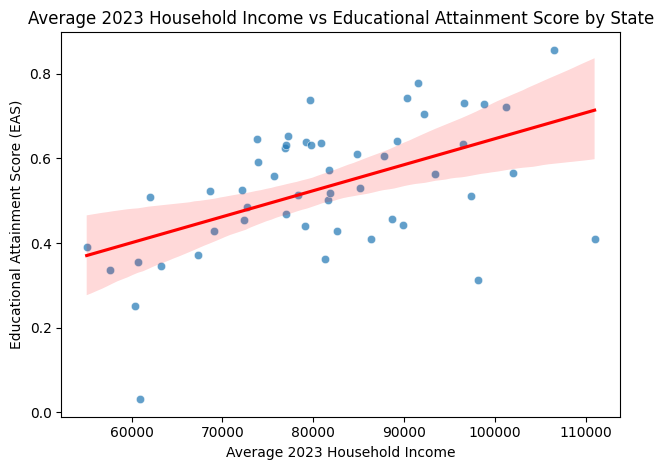

Correlation coefficient: 0.5284


In [ ]:
eas = final_df[['State', 'EAS (Educational Attainment Score)']]
eas.rename(columns={'EAS (Educational Attainment Score)': 'EAS'}, inplace=True)

household_income = pd.read_excel(os.path.join(folder_path, "household.xlsx"), header=1)
household_income_long = household_income.melt(id_vars=['State'], var_name='Year', value_name='Household_Income')
household_income_long['Year'] = household_income_long['Year'].astype(int)

income_2023 = household_income_long[household_income_long['Year'] == 2023]

merged_2023 = pd.merge(income_2023, eas, on='State')

sns.scatterplot(data=merged_2023, x='Household_Income', y='EAS', alpha=0.7)

sns.regplot(data=merged_2023, x='Household_Income', y='EAS', scatter=False, color='red')

plt.title('Average 2023 Household Income vs Educational Attainment Score by State')
plt.xlabel('Average 2023 Household Income')
plt.ylabel('Educational Attainment Score (EAS)')
plt.tight_layout()
plt.show()


correlation = merged_2023['Household_Income'].corr(merged_2023['EAS'])
print(f"Correlation coefficient: {correlation:.4f}")

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_ts, cmap='Blues', annot=False, cbar_kws={'label': 'Educational Attainment Score (EAS)'})

plt.title('Heatmap of EAS by Teacher Salary and Year')
plt.xlabel('Year')
plt.ylabel('Teacher Salary Bin')

plt.xticks(rotation=45)

years = pivot_ts.columns.astype(int)

ticks_to_show = [year for year in years if year % 5 == 0]

tick_positions = [list(years).index(year) for year in ticks_to_show]

plt.xticks(ticks=tick_positions, labels=ticks_to_show, rotation=45)

plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


NameError: name 'pivot_ts' is not defined

<Figure size 1000x600 with 0 Axes>

<ipython-input-18-3ef88b6a4231>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



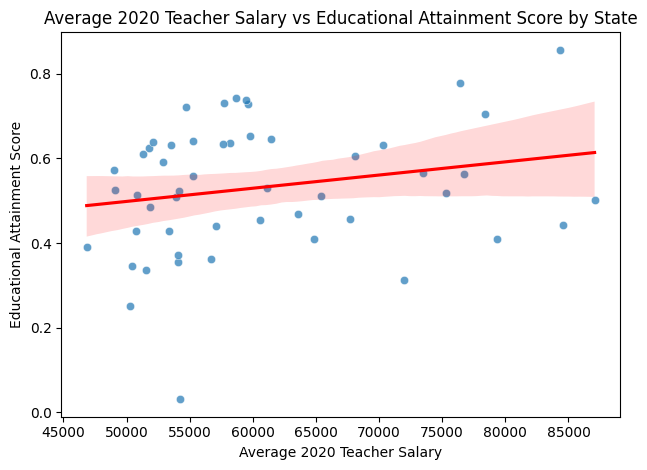

In [ ]:
eas = final_df[['State', 'EAS (Educational Attainment Score)']]
eas.rename(columns={'EAS (Educational Attainment Score)': 'EAS'}, inplace=True)

teacher_salary = pd.read_excel(os.path.join(folder_path, "public-school-teacher-salaries.xlsx"))
teacher_salary_long = teacher_salary.melt(id_vars='State', var_name='Year', value_name='Teacher_Salary')
teacher_salary_long['Year'] = teacher_salary_long['Year'].astype(int)

salary_2020 = teacher_salary_long[teacher_salary_long['Year'] == 2020]

merged_2020 = pd.merge(salary_2020, eas, on='State')

sns.scatterplot(data=merged_2020, x='Teacher_Salary', y='EAS', alpha=0.7)

sns.regplot(data=merged_2020, x='Teacher_Salary', y='EAS', scatter=False, color='red')

plt.title('Average 2020 Teacher Salary vs Educational Attainment Score by State')
plt.xlabel('Average 2020 Teacher Salary')
plt.ylabel('Educational Attainment Score')
plt.tight_layout()
plt.show()

        State $$PerChild  FundingPerChild
0  New Jersey    $16,302          16302.0
1      Oregon    $16,132          16132.0
2  California    $15,307          15307.0
3  Washington    $11,940          11940.0
4    Michigan    $11,854          11854.0


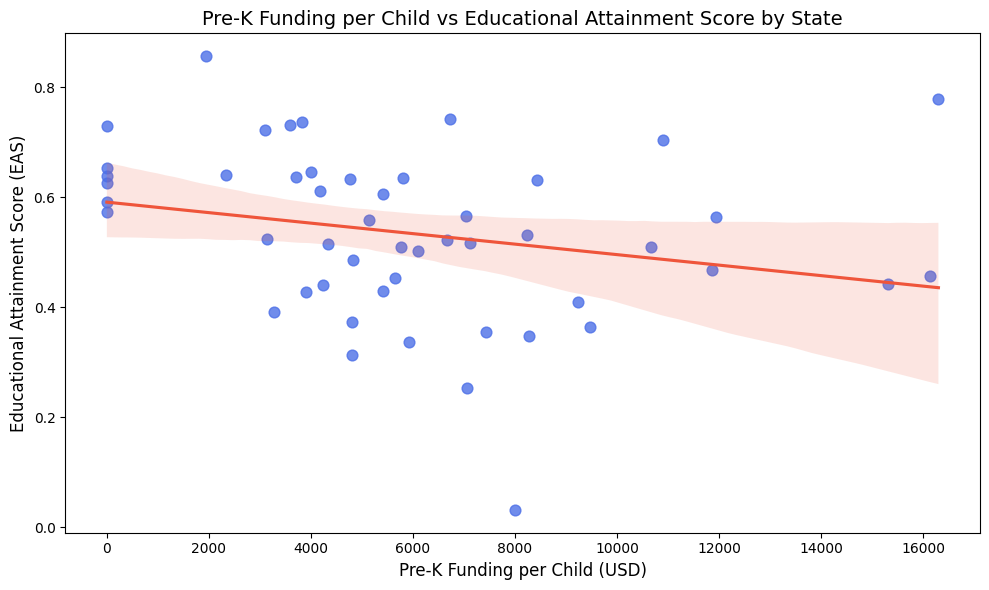

In [ ]:
#PreK funding vs attainment
funding_df = pd.read_csv(
    '/content/drive/MyDrive/Education Analysis - S25 DataBlog/Data files/PreK_Funding.csv',
    skiprows=2,  # Skip the first 2 rows that contain NaNs and duplicated headers
    names=['State', '$$PerChild']  # Set the correct column names
)

funding_df['State'] = funding_df['State'].str.replace('*', '', regex=False).str.strip()

funding_df['FundingPerChild'] = funding_df['$$PerChild'].replace('[\$,]', '', regex=True).astype(float)

funding_df = funding_df.dropna(subset=['FundingPerChild'])

print(funding_df.head())

merged_funding_df = pd.merge(final_df, funding_df[['State', 'FundingPerChild']], on='State', how='inner')

plt.figure(figsize=(10, 6))
sns.regplot(
    data=merged_funding_df,
    x='FundingPerChild',
    y='EAS (Educational Attainment Score)',
    scatter_kws={'s': 60, 'color': '#4C6FE7'},
    line_kws={'color': '#EF553B'}
)
plt.title('Pre-K Funding per Child vs Educational Attainment Score by State', fontsize=14)
plt.xlabel('Pre-K Funding per Child (USD)', fontsize=12)
plt.ylabel('Educational Attainment Score (EAS)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()



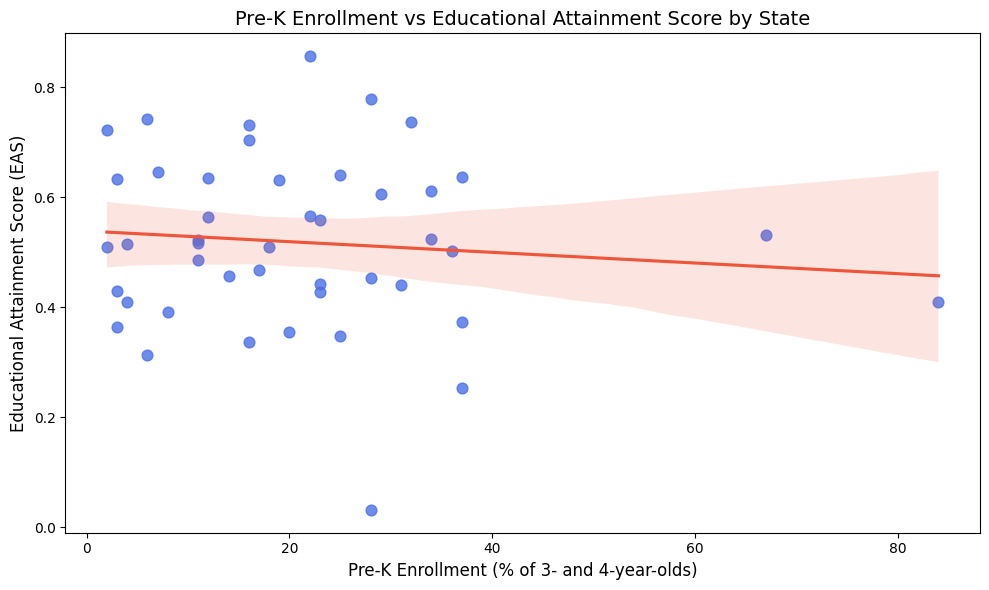

In [ ]:
#PreK enrollment vs attainment

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

prek_df = pd.read_csv(os.path.join(folder_path, "Pre-K_Enrollment.csv"))
prek_df.columns = prek_df.columns.str.strip()

prek_df = prek_df.rename(columns={
    'Unnamed: 0': 'State',
    'Total % (3 and 4s)': 'PreK Enrollment (%)'
})

prek_df['PreK Enrollment (%)'] = prek_df['PreK Enrollment (%)'].str.replace('%', '').astype(float)
prek_df['State'] = prek_df['State'].str.replace('*','').str.strip()

merged_df = pd.merge(final_df, prek_df[['State', 'PreK Enrollment (%)']], on='State', how='inner')

plt.figure(figsize=(10, 6))
sns.regplot(
    data=merged_df,
    x='PreK Enrollment (%)',
    y='EAS (Educational Attainment Score)',
    scatter_kws={'s': 60, 'color': '#4C6FE7'},
    line_kws={'color': '#EF553B'}
)
plt.title('Pre-K Enrollment vs Educational Attainment Score by State', fontsize=14)
plt.xlabel('Pre-K Enrollment (% of 3- and 4-year-olds)', fontsize=12)
plt.ylabel('Educational Attainment Score (EAS)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()




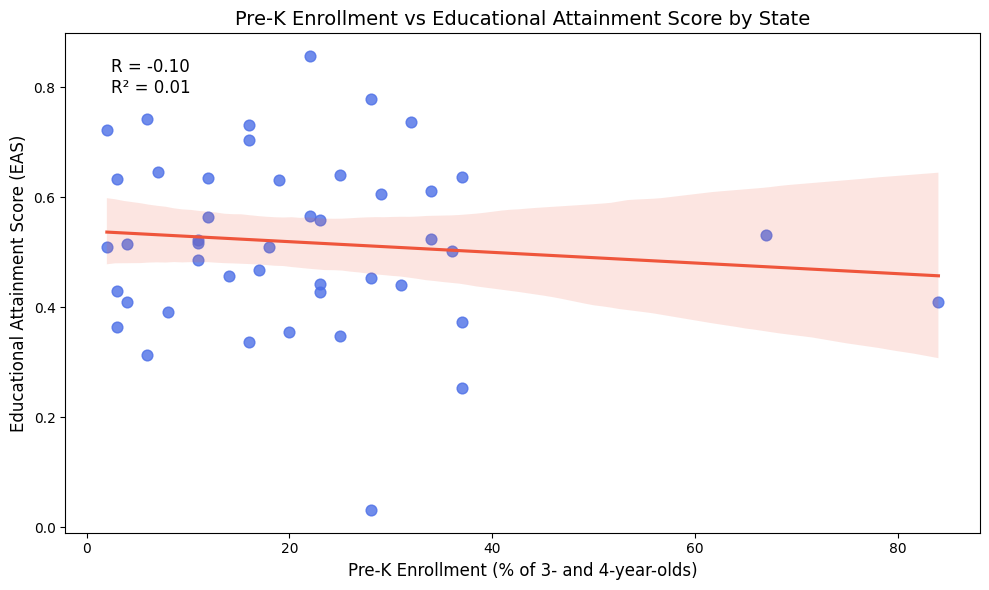

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr

prek_df = pd.read_csv(os.path.join(folder_path, "Pre-K_Enrollment.csv"))
prek_df.columns = prek_df.columns.str.strip()

prek_df = prek_df.rename(columns={
    'Unnamed: 0': 'State',
    'Total % (3 and 4s)': 'PreK Enrollment (%)'
})

prek_df['PreK Enrollment (%)'] = prek_df['PreK Enrollment (%)'].str.replace('%', '').astype(float)
prek_df['State'] = prek_df['State'].str.replace('*','').str.strip()

merged_df = pd.merge(final_df, prek_df[['State', 'PreK Enrollment (%)']], on='State', how='inner')

x = merged_df['PreK Enrollment (%)']
y = merged_df['EAS (Educational Attainment Score)']
r, p = pearsonr(x, y)
r_squared = r ** 2

plt.figure(figsize=(10, 6))
sns.regplot(
    data=merged_df,
    x='PreK Enrollment (%)',
    y='EAS (Educational Attainment Score)',
    scatter_kws={'s': 60, 'color': '#4C6FE7'},
    line_kws={'color': '#EF553B'}
)
plt.title('Pre-K Enrollment vs Educational Attainment Score by State', fontsize=14)
plt.xlabel('Pre-K Enrollment (% of 3- and 4-year-olds)', fontsize=12)
plt.ylabel('Educational Attainment Score (EAS)', fontsize=12)

plt.text(
    0.05, 0.95, f'R = {r:.2f}\nR² = {r_squared:.2f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top'
)

plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
#EAS overtime
import pandas as pd
import os


NAEP_math_grade4_2013 = pd.read_csv(os.path.join(folder_path, "NAEP_Math_Grade_4_2013.csv"))
NAEP_math_grade8_2013 = pd.read_csv(os.path.join(folder_path, "NAEP_Math_Grade_8_2013.csv"))
NAEP_reading_grade4_2013 = pd.read_csv(os.path.join(folder_path, "NAEP_Reading_Grade_4_2013.csv"))
NAEP_reading_grade8_2013 = pd.read_csv(os.path.join(folder_path, "NAEP_Reading_Grade_8_2013.csv"))
expected_years_schooling = pd.read_csv(os.path.join(folder_path, "GDL-Expected-years-schooling-data.csv"))


math4_2013 = NAEP_math_grade4.set_index('Jurisdiction')['Average scale score']
math8_2013 = NAEP_math_grade8.set_index('Jurisdiction')['Average scale score']
read4_2013 = NAEP_reading_grade4.set_index('Jurisdiction')['Average scale score']
read8_2013 = NAEP_reading_grade8.set_index('Jurisdiction')['Average scale score']

average_math_2013 = (math4_2013 + math8_2013) / 2
average_reading_2013 = (read4_2013 + read8_2013) / 2

NAEP_math_scaled_2013 = scale(average_math_2013)
NAEP_reading_scaled_2013 = scale(average_reading_2013)

expected_schooling_2013 = expected_years_schooling[expected_years_schooling['Region'] != 'Total']
expected_schooling_2013 = expected_schooling_2013.set_index('Region')['2013']
scaled_expected_schooling_2013 = scale(expected_schooling_2013)

grad_2012_13 = graduation_rates.set_index('State or jurisdiction')['2012-13']
scaled_grad_2013 = scale(grad_2012_13)

education_metrics_2013 = pd.DataFrame({
    'Expected Schooling': scaled_expected_schooling_2013,
    'NAEP Reading': NAEP_reading_scaled_2013,
    'NAEP Math': NAEP_math_scaled_2013,
    'Graduation Rate (2012-13)': scaled_grad_2013
})


education_metrics_2013['EAS_2013'] = education_metrics_2013.mean(axis=1)

final_df_2013 = education_metrics_2013.reset_index().rename(columns={'index': 'State'})
final_EAS_score = final_df_2013['EAS_2013']
final_df_2013[['State', 'EAS_2013']]


grad_2022_23 = graduation_rates.set_index('State or jurisdiction')['2022-23']
scaled_grad_rates = scale(grad_2022_23)
scaled_grad_rates


education_metrics = pd.DataFrame({
    'Expected Schooling': expected_schooling_scaled,
    'NAEP Reading': NAEP_reading_scaled,
    'NAEP Math': NAEP_math_scaled,
    'Graduation Rate (2022-23)': scaled_grad_rates
})

education_metrics = education_metrics.dropna()

education_metrics['EAS (Educational Attainment Score)'] = education_metrics.mean(axis=1)

final_df_2023 = education_metrics.reset_index().rename(columns={'index': 'State'})
final_EAS_score = final_df_2023['EAS (Educational Attainment Score)']
final_df_2023[['State', 'EAS (Educational Attainment Score)']]

,State,EAS (Educational Attainment Score)
0,Alabama,0.354185
1,Alaska,0.312647
2,Arizona,0.429432
3,Arkansas,0.346986
4,California,0.441962
5,Colorado,0.731449
6,Connecticut,0.704088
7,Delaware,0.409428
8,District of Columbia,0.408940
9,Florida,0.524445


In [ ]:
# EAS by region

final_df_2013 = final_df_2013.rename(columns={'EAS (Educational Attainment Score)': 'EAS_2013'})
final_df_2023 = final_df_2023.rename(columns={'EAS (Educational Attainment Score)': 'EAS_2023'})

merged_df = pd.merge(final_df_2013[['State', 'EAS_2013']],
                     final_df_2023[['State', 'EAS_2023']],
                     on='State', how='inner')

region_map = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia',
              'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

state_to_region = {state: region for region, states in region_map.items() for state in states}
merged_df['Region'] = merged_df['State'].map(state_to_region)

region_avg = merged_df.groupby('Region')[['EAS_2013', 'EAS_2023']].mean().reset_index()

region_melted = region_avg.melt(id_vars='Region',
                                value_vars=['EAS_2013', 'EAS_2023'],
                                var_name='Year', value_name='Average EAS')

region_melted['Year'] = region_melted['Year'].replace({
    'EAS_2013': '2013',
    'EAS_2023': 'Current'
})

import plotly.express as px
fig = px.bar(region_melted, x='Region', y='Average EAS', color='Year',
             barmode='group',
             title='Average Educational Attainment Score (EAS) by U.S. Region: 2013 vs Current')
fig.show()





In [ ]:
# Compare over decades (2003, 2013, current)

folder_path = '/content/drive/MyDrive/Education Analysis - S25 DataBlog/Data files'

NAEP_math_grade4_2003 = pd.read_csv(os.path.join(folder_path, "NAEP_Math_Grade4_2003.csv"))
NAEP_math_grade8_2003 = pd.read_csv(os.path.join(folder_path, "NAEP_Math_Grade8_2003.csv"))
NAEP_reading_grade4_2003 = pd.read_csv(os.path.join(folder_path, "NAEP_Reading_Grade4_2003.csv"))
NAEP_reading_grade8_2003 = pd.read_csv(os.path.join(folder_path, "NAEP_Reading_Grade8_2003.csv"))



math4_2003 = NAEP_math_grade4_2003.set_index('Jurisdiction')['Average scale score']
math8_2003 = NAEP_math_grade8_2003.set_index('Jurisdiction')['Average scale score']
read4_2003 = NAEP_reading_grade4_2003.set_index('Jurisdiction')['Average scale score']
read8_2003 = NAEP_reading_grade8_2003.set_index('Jurisdiction')['Average scale score']

average_math_2003 = (math4_2003 + math8_2003) / 2
average_reading_2003 = (read4_2003 + read8_2003) / 2

average_math_2003.drop("District of Columbia",inplace=True)
average_reading_2003.drop("District of Columbia",inplace=True)

NAEP_math_scaled_2003 = scale(average_math_2003)
NAEP_reading_scaled_2003 = scale(average_reading_2003)

expected_schooling_2003 = expected_years_schooling.set_index('Region')['2003']
expected_schooling_2003.drop("District of Columbia",inplace=True)
scaled_expected_schooling_2003 = scale(expected_schooling_2003)

grad_2002_03 = graduation_rates.set_index('State or jurisdiction')['2000-01']
grad_2002_03.drop("District of Columbia",inplace=True)
scaled_grad_2003 = scale(grad_2002_03)
education_metrics_2003 = pd.DataFrame({
    'Expected Schooling': scaled_expected_schooling_2003,
    'NAEP Reading': NAEP_reading_scaled_2003,
    'NAEP Math': NAEP_math_scaled_2003,
    'Graduation Rate (2002-03)': scaled_grad_2003
})
education_metrics_2003['EAS_2003'] = education_metrics_2003.mean(axis=1)
final_df_2003 = education_metrics_2003.reset_index().rename(columns={'index': 'State'})
final_df_2003 = final_df_2003.rename(columns={'EAS (Educational Attainment Score)': 'EAS_2003'})
merged_df2 = pd.merge(final_df_2003[['State', 'EAS_2003']],
                     merged_df.copy(), on='State', how='inner')
merged_df2['Region'] = merged_df2['State'].map(state_to_region)

universal_mean = merged_df2[['EAS_2003','EAS_2013','EAS_2023']].mean().mean()
merged_df2['EAS_2003'] = merged_df2['EAS_2003'] + universal_mean - merged_df2['EAS_2003'].mean()
merged_df2['EAS_2013'] = merged_df2['EAS_2013'] + universal_mean - merged_df2['EAS_2013'].mean()
merged_df2['EAS_2023'] = merged_df2['EAS_2023'] + universal_mean - merged_df2['EAS_2023'].mean()

region_avg = merged_df2.groupby('Region')[['EAS_2003', 'EAS_2013', 'EAS_2023']].mean().reset_index()
region_melted = region_avg.melt(id_vars='Region',
                                value_vars=['EAS_2003', 'EAS_2013', 'EAS_2023'],
                                var_name='Year', value_name='Average EAS')
region_melted['Year'] = region_melted['Year'].replace({
    'EAS_2003': '2003',
    'EAS_2013': '2013',
    'EAS_2023': 'Current'
})
import plotly.express as px
fig = px.bar(region_melted, x='Region', y='Average EAS', color='Year',
             barmode='group',
             title= 'Average Educational Attainment Score (EAS) Over the Decades: 2003, 2013, and Current')
fig.update_layout(title_x=0.5)
fig.update_layout(
    title={'x': 0.5, 'font': {'size': 24}},
    xaxis={'title_font': {'size': 20}, 'tickfont': {'size': 18}},
    yaxis={'title_font': {'size': 20}, 'tickfont': {'size': 16}},
    legend={'title_font': {'size': 18}, 'font': {'size': 18}}
)
fig.show()


In [ ]:
merged_2020['Teacher_Salary']

In [ ]:
correlation_df

In [ ]:
# Correlation dataframe

states_df = pd.DataFrame(US_all_states, columns = ['State'])

# read/clean data
NSCH_tables = pd.read_excel(os.path.join(folder_path, "NSCH_Data.xlsx"), sheet_name = None)
fiscal_spending = pd.read_csv(os.path.join(folder_path, "Fiscal_Spending_Education.csv"))
fiscal_spending['FY 22'] = fiscal_spending['FY 22'].str.replace(',','').astype(int)
gdp_capita = pd.read_csv(os.path.join(folder_path, "GDP_per_capita.csv"))
gdp_capita.iloc[8] = np.nan
poverty_rate = pd.read_csv(os.path.join(folder_path, "Poverty_rate.csv"))
unemployment_rates = pd.read_csv(os.path.join(folder_path, "Unemployment Rates.csv"))
unemployment_rates = unemployment_rates.set_index('State').reindex(US_all_states).reset_index()
student_teacher_ratio = pd.read_csv(os.path.join(folder_path, "Student_Teacher_Ratio.csv"))
gifted_talented_enrollment = pd.read_csv(os.path.join(folder_path, "Gifted-Talented-Enrollment.csv"))
gifted_talented_enrollment['Total Students'] = gifted_talented_enrollment['Total Students'].str.replace(',','').astype(int)
gifted_talented_enrollment['Number of Schools'] = gifted_talented_enrollment['Number of Schools'].str.replace(',','').astype(int)


correlation_df = pd.DataFrame()

# cultural factors
correlation_df['Percentage of Two Parent Households'] = NSCH_tables['Family Structure']['Two parents']
correlation_df['Percentage of Parents with College Degree'] = NSCH_tables['Parent Highest Level of Educati']['College Degree or Higher']
correlation_df['Average Housing Instability'] = NSCH_tables['Housing Instability']['Housing Instability']
correlation_df['Extracurricular Activities Participation Rate'] = NSCH_tables['Extracurricular Activities']['Participated']

# socioeconomic factors
correlation_df['Average Household Income'] = household_income[2023]
correlation_df['GDP Per Capita'] = gdp_capita['GDP/capita']
correlation_df['Child Poverty Rate'] = poverty_rate['2022']
correlation_df['Unemployment Rate'] = unemployment_rates['Unemployment Rate']

# health/well-being factors
correlation_df['Obesity Rate'] = NSCH_tables['Obesity Rates']['Obese']
correlation_df['Percentage of Children with Excessive Screen Time'] = NSCH_tables['Screen Time']['3+ hours per day']
correlation_df['Percentage of Children with Sufficient Sleep'] = NSCH_tables['Sleep']['Slept enough']
correlation_df['Percentage of Children in Supportive Neighborhood'] = NSCH_tables['Supportive Neighborhood']['Supportive Neighborhood']

# school quality/access factors
correlation_df['Average Teacher Salary'] = merged_2020['Teacher_Salary']
correlation_df['Student-Teacher Ratio'] = student_teacher_ratio['Student-Teacher Ratio']
correlation_df['Government Spending Per Pupil'] = fiscal_spending['FY 22']
correlation_df['Average Gifted and Talented Enrollment Per School'] = gifted_talented_enrollment['Total Students'] / gifted_talented_enrollment['Number of Schools']

correlation_df['EAS'] = final_EAS


In [ ]:
factor_correlation_EAS = correlation_df.corr()[['EAS']]
factor_correlation_EAS.drop('EAS', inplace=True)
factor_correlation_EAS = factor_correlation_EAS**2
factor_correlation_EAS.to_csv('EAS_correlation.csv')



In [ ]:
factor_correlation_EAS

In [ ]:
import numpy as np
from scipy.stats import pearsonr

eas_values = [
    0.354185, 0.312647, 0.429432, 0.346986, 0.441962, 0.731449, 0.704088, 0.409428,
    0.408940, 0.524445, 0.453723, 0.510005, 0.591947, 0.605741, 0.625617, 0.636864,
    0.611086, 0.508585, 0.336482, 0.558870, 0.564839, 0.856419, 0.467659, 0.742717,
    0.391034, 0.514289, 0.637876, 0.640280, 0.363021, 0.729463, 0.778371, 0.031095,
    0.501270, 0.522503, 0.632461, 0.645324, 0.372779, 0.457274, 0.630555, 0.517072,
    0.427834, 0.572582, 0.485655, 0.440915, 0.721592, 0.530883, 0.633984, 0.563443,
    0.252022, 0.736700, 0.653482
]

income_values = [
    60660, 98190, 82660, 63250, 89870, 96640, 92240, 86340, 111000, 72200, 72420,
    97360, 73910, 87820, 76910, 80860, 84830, 61980, 57650, 75740, 102000, 106500,
    76960, 90340, 55060, 78290, 79220, 89190, 81310, 98780, 91590, 60980, 81600,
    68610, 76960, 73770, 67330, 88740, 79820, 81860, 69100, 81740, 72700, 79060,
    101200, 85190, 96490, 93440, 60410, 79690, 77200
]

teacher_salary_values = [
    54095, 72010, 50782, 50456, 84531, 57706, 78427, 64853, 79350, 49102, 60578,
    65409, 52875, 68083, 51745, 58184, 51320, 53907, 51566, 55276, 73444, 84290,
    63568, 58663, 46843, 50817, 52135, 55267, 56672, 59622, 76376, 54256, 87069,
    54150, 53525, 61406, 54096, 67685, 70339, 75336, 53329, 48984, 51862, 57090,
    54678, 61108, 57665, 76743, 50238, 59431, 59786
]

# Pearson correlation coefficients
corr_income, _ = pearsonr(eas_values, income_values)
corr_salary, _ = pearsonr(eas_values, teacher_salary_values)

# R^2
r2_income = corr_income ** 2
r2_salary = corr_salary ** 2

print(f"Correlation coefficient (EAS vs Household Income): {corr_income:.3f}")
print(f"R^2 value (EAS vs Household Income): {r2_income:.3f}")

print(f"Correlation coefficient (EAS vs Teacher Salary): {corr_salary:.3f}")
print(f"R^2 value (EAS vs Teacher Salary): {r2_salary:.3f}")
